In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# reading of data
df=pd.read_csv('heightweight.csv')


In [50]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


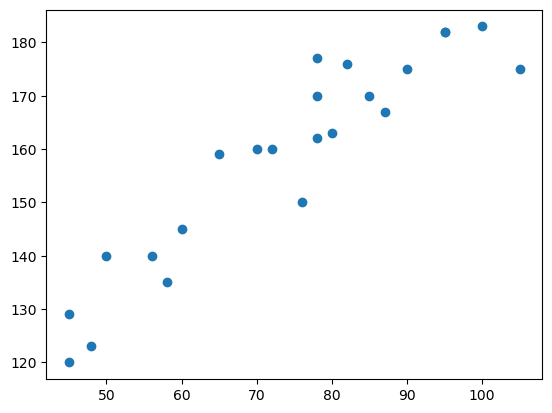

In [51]:
plt.scatter(df.Weight,df.Height)

In [52]:
#divide the data into X,y
x=df[["Weight"]]
y=df['Height']

In [53]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [54]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [55]:
#train -test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.03,random_state=1)

In [56]:
x_train

,Weight
17,65
3,60
13,100
19,87
16,50
10,82
4,70
2,48
18,76
6,80


In [57]:
y_train

17    159
3     145
13    183
19    167
16    140
10    176
4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

In [58]:
#scaling
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()

In [60]:
x_train

,Weight
17,65
3,60
13,100
19,87
16,50
10,82
4,70
2,48
18,76
6,80


In [61]:
#train >> fit tarnsform
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [62]:
x_test

array([[-1.80119822]])

In [63]:
x_train

array([[-0.60583289],
       [-0.90467422],
       [ 1.48605645],
       [ 0.70906898],
       [-1.50235689],
       [ 0.41022765],
       [-0.30699155],
       [-1.62189342],
       [ 0.05161805],
       [ 0.29069112],
       [ 0.88837378],
       [-1.02421075],
       [ 0.58953245],
       [-1.80119822],
       [ 0.17115458],
       [-0.18745502],
       [-1.14374729],
       [ 0.17115458],
       [ 1.18721512],
       [ 1.78489779],
       [ 1.18721512],
       [ 0.17115458]])

In [64]:
#model training
from sklearn.linear_model import LinearRegression

In [65]:
reg=LinearRegression()

In [66]:
reg

LinearRegression()

In [67]:
reg.fit(x_train,y_train)

LinearRegression()

In [68]:
print("The coef is",reg.coef_)
print("The intercept is",reg.intercept_)

The coef is [17.00086122]
The intercept is 159.72727272727272


In [69]:
#y_pred=intercept+coef(x)
#159+x_train*17

In [70]:
reg.predict(x_train)

array([149.42759191, 144.34703186, 184.99151223, 171.78205611,
       134.18591177, 166.70149606, 154.50815195, 132.15368775,
       160.60482401, 164.66927204, 174.83039214, 142.31480784,
       169.74983209, 129.10535173, 162.63704803, 156.54037597,
       140.28258383, 162.63704803, 179.91095218, 190.07207227,
       179.91095218, 162.63704803])

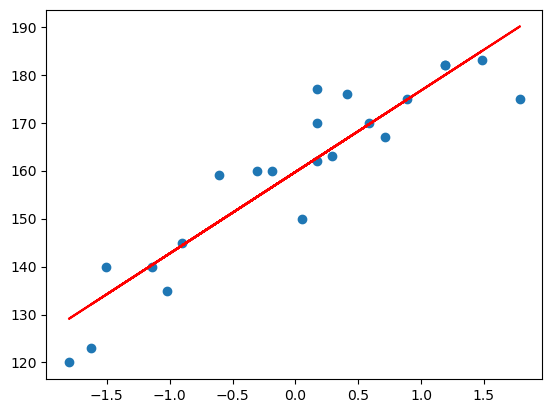

In [71]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='red')

In [72]:
y_pred_test=reg.predict(x_test)

In [73]:
y_pred_test

array([129.10535173])

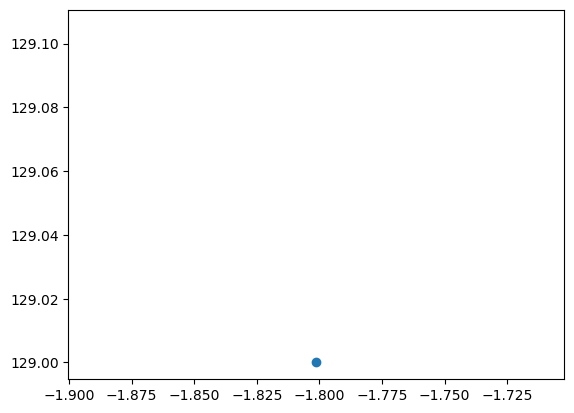

In [74]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test)

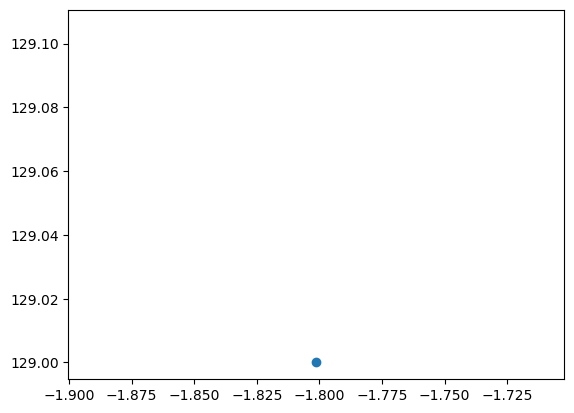

In [75]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,'g')

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [77]:
mean_squared_error(y_test,y_pred_test)

0.011098986164934953

In [78]:
mean_absolute_error(y_test,y_pred_test)

0.10535172597036535

In [79]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

0.10535172597036535

In [80]:
r2_score(y_test,y_pred_test) #85% of y is explained by X,rsquare 0 to 1

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [81]:
#adj rsquare = 1-(1-rsq)*N-1/n-p-1

In [82]:
score=r2_score(y_test,y_pred_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [83]:
score

nan

In [84]:
y_test

20    129
Name: Height, dtype: int64

In [89]:
1-(1-score)*(len(y_test)-1)/len(y_test) - x_test.shape[1]-1

nan